<a href="https://colab.research.google.com/github/ManishSuhas0026/Deep-Learning/blob/main/2348530_DL_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, precision_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score

In [ ]:
train_cancer = "melanoma_cancer_dataset/train"
test_cancer = "melanoma_cancer_dataset/test"

In [ ]:
img_size = (64, 64)
batch_size = 32
EPOCHS= 50

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_cancer,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    test_cancer,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary')

Found 9605 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)

{'benign': 0, 'malignant': 1}


In [ ]:
class_indices = train_generator.class_indices
steps_per_epoch = train_generator.samples // batch_size
validation_steps = val_generator.samples // batch_size

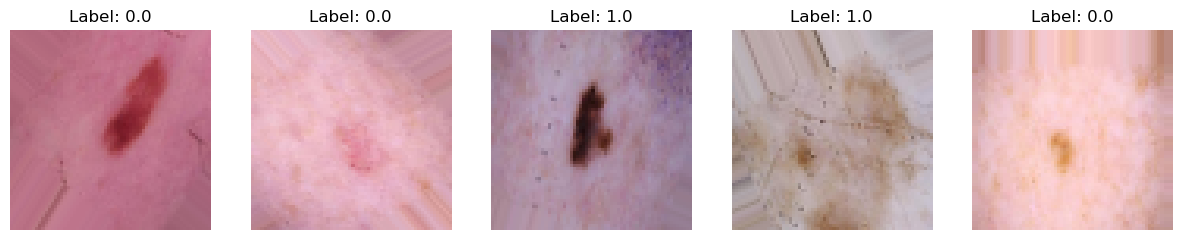

In [ ]:
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(15, 3))
for i in range(5):
    image = x_batch[i]
    label = y_batch[i]
    image = (image * 255).astype(int)
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.title('Label: {}'.format(label))
    plt.axis('off')

plt.show()

In [ ]:
def custom_skin_cancer_model(input_shape):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten layer
    model.add(Flatten())

    # Dense layers
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    return model

In [ ]:
input_shape = (64, 64, 3)  # Assuming images are resized to 224x224
custom_model = custom_skin_cancer_model(input_shape)
custom_model.summary()

C:\Users\DESTOP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,176,385 (4.49 MB)

 Trainable params: 1,176,385 (4.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
custom_output_layers = Sequential([
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
vgg16_model.trainable = False

vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
vgg19_model.trainable = False

In [ ]:
combined_model_vgg16 = Sequential([
    vgg16_model,
    custom_output_layers
])
combined_model_vgg16.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
combined_model_vgg19 = Sequential([
    vgg19_model,
    custom_output_layers
])
combined_model_vgg19.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ ?                      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
custom_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
combined_model_vgg16.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])
combined_model_vgg19.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
custom_model_history = custom_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/50


C:\Users\DESTOP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


300/300 ━━━━━━━━━━━━━━━━━━━━ 49s 149ms/step - accuracy: 0.6765 - loss: 0.5786 - val_accuracy: 0.7671 - val_loss: 0.4123
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.5625 - loss: 0.3411 - val_accuracy: 0.7500 - val_loss: 0.1766
Epoch 3/50


C:\Users\DESTOP\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


300/300 ━━━━━━━━━━━━━━━━━━━━ 43s 141ms/step - accuracy: 0.8271 - loss: 0.3886 - val_accuracy: 0.8942 - val_loss: 0.2841
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - accuracy: 0.8750 - loss: 0.1448 - val_accuracy: 1.0000 - val_loss: 0.0087
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 43s 142ms/step - accuracy: 0.8532 - loss: 0.3538 - val_accuracy: 0.8942 - val_loss: 0.2955
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - accuracy: 0.8750 - loss: 0.1990 - val_accuracy: 1.0000 - val_loss: 0.0239
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 44s 144ms/step - accuracy: 0.8781 - loss: 0.2957 - val_accuracy: 0.8901 - val_loss: 0.2682
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 172us/step - accuracy: 0.9375 - loss: 0.1445 - val_accuracy: 0.8750 - val_loss: 0.0603
Epoch 9/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 46s 150ms/step - accuracy: 0.8788 - loss: 0.3043 - val_accuracy: 0.8740 - val_loss: 0.2910


In [ ]:
combined_vgg16_history = combined_model_vgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 158s 517ms/step - accuracy: 0.7116 - loss: 0.5480 - val_accuracy: 0.8508 - val_loss: 0.3626
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8438 - loss: 0.2070 - val_accuracy: 1.0000 - val_loss: 0.0962
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 160s 529ms/step - accuracy: 0.8167 - loss: 0.4125 - val_accuracy: 0.8871 - val_loss: 0.2892
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.9062 - loss: 0.1713 - val_accuracy: 1.0000 - val_loss: 0.0623
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 152s 504ms/step - accuracy: 0.8255 - loss: 0.3891 - val_accuracy: 0.8851 - val_loss: 0.2925
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9062 - loss: 0.1064 - val_accuracy: 0.7500 - val_loss: 0.1988
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 150s 497ms/step - accuracy: 0.8370 - loss: 0.3701 - val_accuracy: 0.8942 - val_loss: 0.2635
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.9062 - loss: 0.138

In [ ]:
combined_vgg19_history = combined_model_vgg19.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)]
)

Epoch 1/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 247s 813ms/step - accuracy: 0.7930 - loss: 0.4506 - val_accuracy: 0.8740 - val_loss: 0.2857
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7500 - loss: 0.2414 - val_accuracy: 0.7500 - val_loss: 0.1819
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 269s 892ms/step - accuracy: 0.8124 - loss: 0.4060 - val_accuracy: 0.8760 - val_loss: 0.2813
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8438 - loss: 0.1882 - val_accuracy: 0.7500 - val_loss: 0.1922
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 294s 976ms/step - accuracy: 0.8282 - loss: 0.3749 - val_accuracy: 0.8800 - val_loss: 0.2893
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7812 - loss: 0.2148 - val_accuracy: 0.7500 - val_loss: 0.1580
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 275s 914ms/step - accuracy: 0.8299 - loss: 0.3662 - val_accuracy: 0.8730 - val_loss: 0.2752
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8438 - loss: 0.1707 - 

In [ ]:
custom_model_evaluation = custom_model.evaluate(val_generator)
print("Custom CNN Model Evaluation:")
print("Loss:", custom_model_evaluation[0])
print("Accuracy:", custom_model_evaluation[1])

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.8764 - loss: 0.2902
Custom CNN Model Evaluation:
Loss: 0.2951538562774658
Accuracy: 0.875


In [ ]:
combined_vgg16_evaluation = combined_model_vgg16.evaluate(val_generator)
print("\nCombined Model with VGG16 Evaluation:")
print("Loss:", combined_vgg16_evaluation[0])
print("Accuracy:", combined_vgg16_evaluation[1])

32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 650ms/step - accuracy: 0.8270 - loss: 0.5180

Combined Model with VGG16 Evaluation:
Loss: 0.47521060705184937
Accuracy: 0.8410000205039978


In [ ]:
combined_vgg19_evaluation = combined_model_vgg19.evaluate(val_generator)
print("\nCombined Model with VGG19 Evaluation:")
print("Loss:", combined_vgg19_evaluation[0])
print("Accuracy:", combined_vgg19_evaluation[1])

32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 811ms/step - accuracy: 0.8570 - loss: 0.3306

Combined Model with VGG19 Evaluation:
Loss: 0.2827613055706024
Accuracy: 0.8849999904632568


In [ ]:
custom_model_predictions = custom_model.predict(val_generator)
combined_vgg16_predictions = combined_model_vgg16.predict(val_generator)
combined_vgg19_predictions = combined_model_vgg19.predict(val_generator)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 700ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 865ms/step


In [ ]:
custom_model_pred_labels = (custom_model_predictions > 0.5).astype(int)
combined_vgg16_pred_labels = (combined_vgg16_predictions > 0.5).astype(int)
combined_vgg19_pred_labels = (combined_vgg19_predictions > 0.5).astype(int)

In [ ]:
true_labels = val_generator.classes

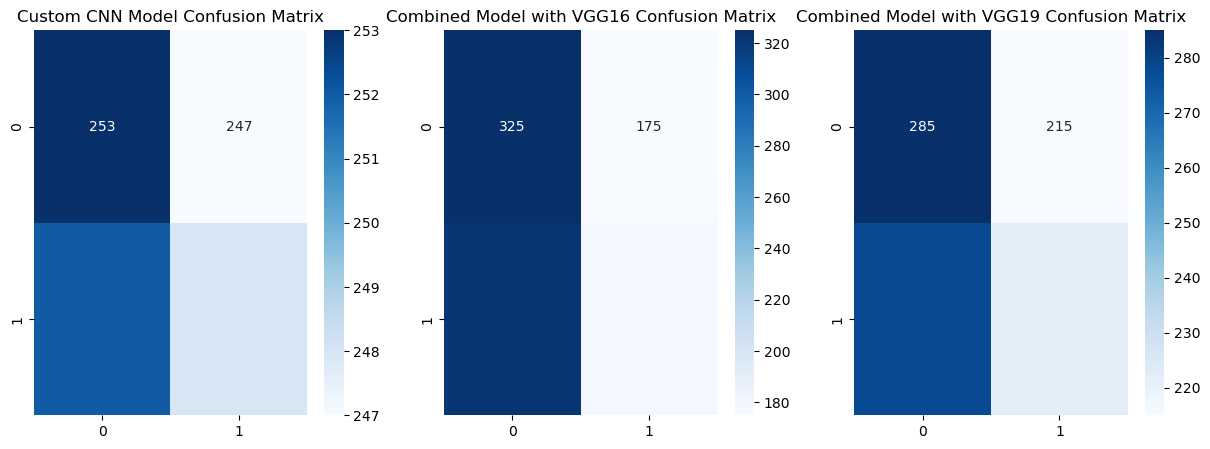

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(true_labels, custom_model_pred_labels), annot=True, fmt='d', cmap='Blues')
plt.title("Custom CNN Model Confusion Matrix")

plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(true_labels, combined_vgg16_pred_labels), annot=True, fmt='d', cmap='Blues')
plt.title("Combined Model with VGG16 Confusion Matrix")

plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(true_labels, combined_vgg19_pred_labels), annot=True, fmt='d', cmap='Blues')
plt.title("Combined Model with VGG19 Confusion Matrix")

plt.show()

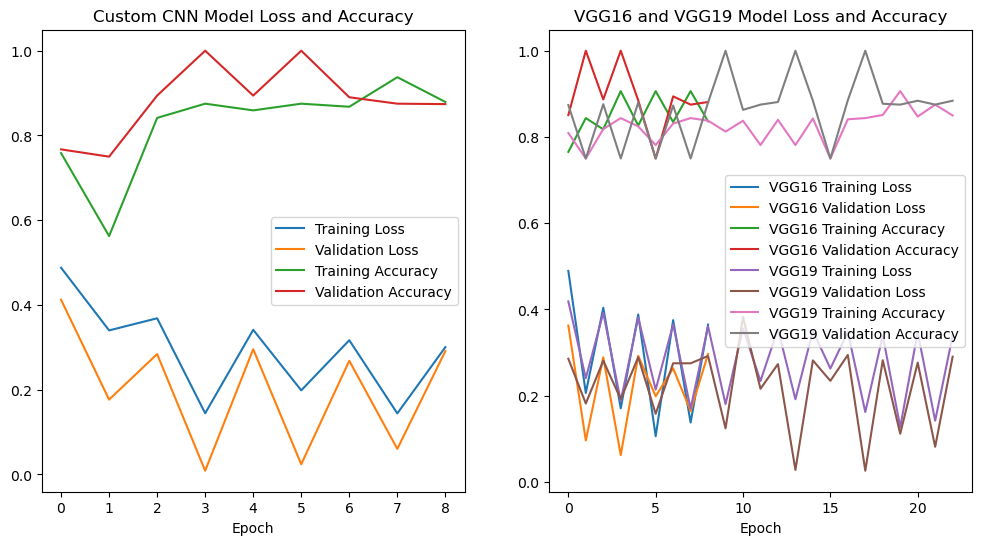

In [ ]:
plt.figure(figsize=(12, 6))

# Plot Custom CNN model
plt.subplot(1, 2, 1)
plt.plot(custom_model_history.history['loss'], label='Training Loss')
plt.plot(custom_model_history.history['val_loss'], label='Validation Loss')
plt.plot(custom_model_history.history['accuracy'], label='Training Accuracy')
plt.plot(custom_model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Custom CNN Model Loss and Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot VGG16 model
plt.subplot(1, 2, 2)
plt.plot(combined_vgg16_history.history['loss'], label='VGG16 Training Loss')
plt.plot(combined_vgg16_history.history['val_loss'], label='VGG16 Validation Loss')
plt.plot(combined_vgg16_history.history['accuracy'], label='VGG16 Training Accuracy')
plt.plot(combined_vgg16_history.history['val_accuracy'], label='VGG16 Validation Accuracy')

# Plot VGG19 model
plt.plot(combined_vgg19_history.history['loss'], label='VGG19 Training Loss')
plt.plot(combined_vgg19_history.history['val_loss'], label='VGG19 Validation Loss')
plt.plot(combined_vgg19_history.history['accuracy'], label='VGG19 Training Accuracy')
plt.plot(combined_vgg19_history.history['val_accuracy'], label='VGG19 Validation Accuracy')

plt.title('VGG16 and VGG19 Model Loss and Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return accuracy, precision, recall, f1, roc_auc, specificity

In [ ]:
custom_model_metrics = calculate_metrics(true_labels, custom_model_pred_labels)

vgg16_metrics = calculate_metrics(true_labels, combined_vgg16_pred_labels)

vgg19_metrics = calculate_metrics(true_labels, combined_vgg19_pred_labels)

In [ ]:
print("Custom CNN Model Metrics:")
print("Accuracy:", custom_model_metrics[0])
print("Precision:", custom_model_metrics[1])
print("Recall:", custom_model_metrics[2])
print("F1-score:", custom_model_metrics[3])
print("ROC-AUC:", custom_model_metrics[4])
print("Specificity:", custom_model_metrics[5])
print("\nVGG16 Model Metrics:")
print("Accuracy:", vgg16_metrics[0])
print("Precision:", vgg16_metrics[1])
print("Recall:", vgg16_metrics[2])
print("F1-score:", vgg16_metrics[3])
print("ROC-AUC:", vgg16_metrics[4])
print("Specificity:", vgg16_metrics[5])
print("\nVGG19 Model Metrics:")
print("Accuracy:", vgg19_metrics[0])
print("Precision:", vgg19_metrics[1])
print("Recall:", vgg19_metrics[2])
print("F1-score:", vgg19_metrics[3])
print("ROC-AUC:", vgg19_metrics[4])
print("Specificity:", vgg19_metrics[5])

Custom CNN Model Metrics:
Accuracy: 0.501
Precision: 0.501010101010101
Recall: 0.496
F1-score: 0.4984924623115578
ROC-AUC: 0.501
Specificity: 0.506

VGG16 Model Metrics:
Accuracy: 0.503
Precision: 0.5042492917847026
Recall: 0.356
F1-score: 0.4173505275498241
ROC-AUC: 0.503
Specificity: 0.65

VGG19 Model Metrics:
Accuracy: 0.507
Precision: 0.5080091533180778
Recall: 0.444
F1-score: 0.47385272145144075
ROC-AUC: 0.507
Specificity: 0.57
